In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
!nvidia-smi

Wed Oct  2 12:47:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 13.7 MB/s eta 0:00:00


In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
ultralytics.checks()

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.0/112.6 GB disk)


# yolo v8

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZlJqU9FcIqZLHUFSWKkY")
project = rf.workspace("qcdgrp19").project("potholedetection-6fvuv")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PotholeDetection-1 in yolov8:: 100%|██████████| 827/827 [00:00<00:00, 5890.18it/s]


In [ ]:
dataset = version.download("yolov8")
print(dataset.location)


Dependency ultralytics==8.0.196 is required but found version=8.3.3, to fix: `pip install ultralytics==8.0.196`
/content/PotholeDetection-1


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data='/content/PotholeDetection-1/data.yaml' epochs=70 imgsz=640


100% 49.7M/49.7M [00:00<00:00, 130MB/s]
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/PotholeDetection-1/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [ ]:
!ls /content/runs/detect/train

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1727873339.5219cba5c947.1507.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1380.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1381.jpg  weights
P_curve.png					    train_batch1382.jpg


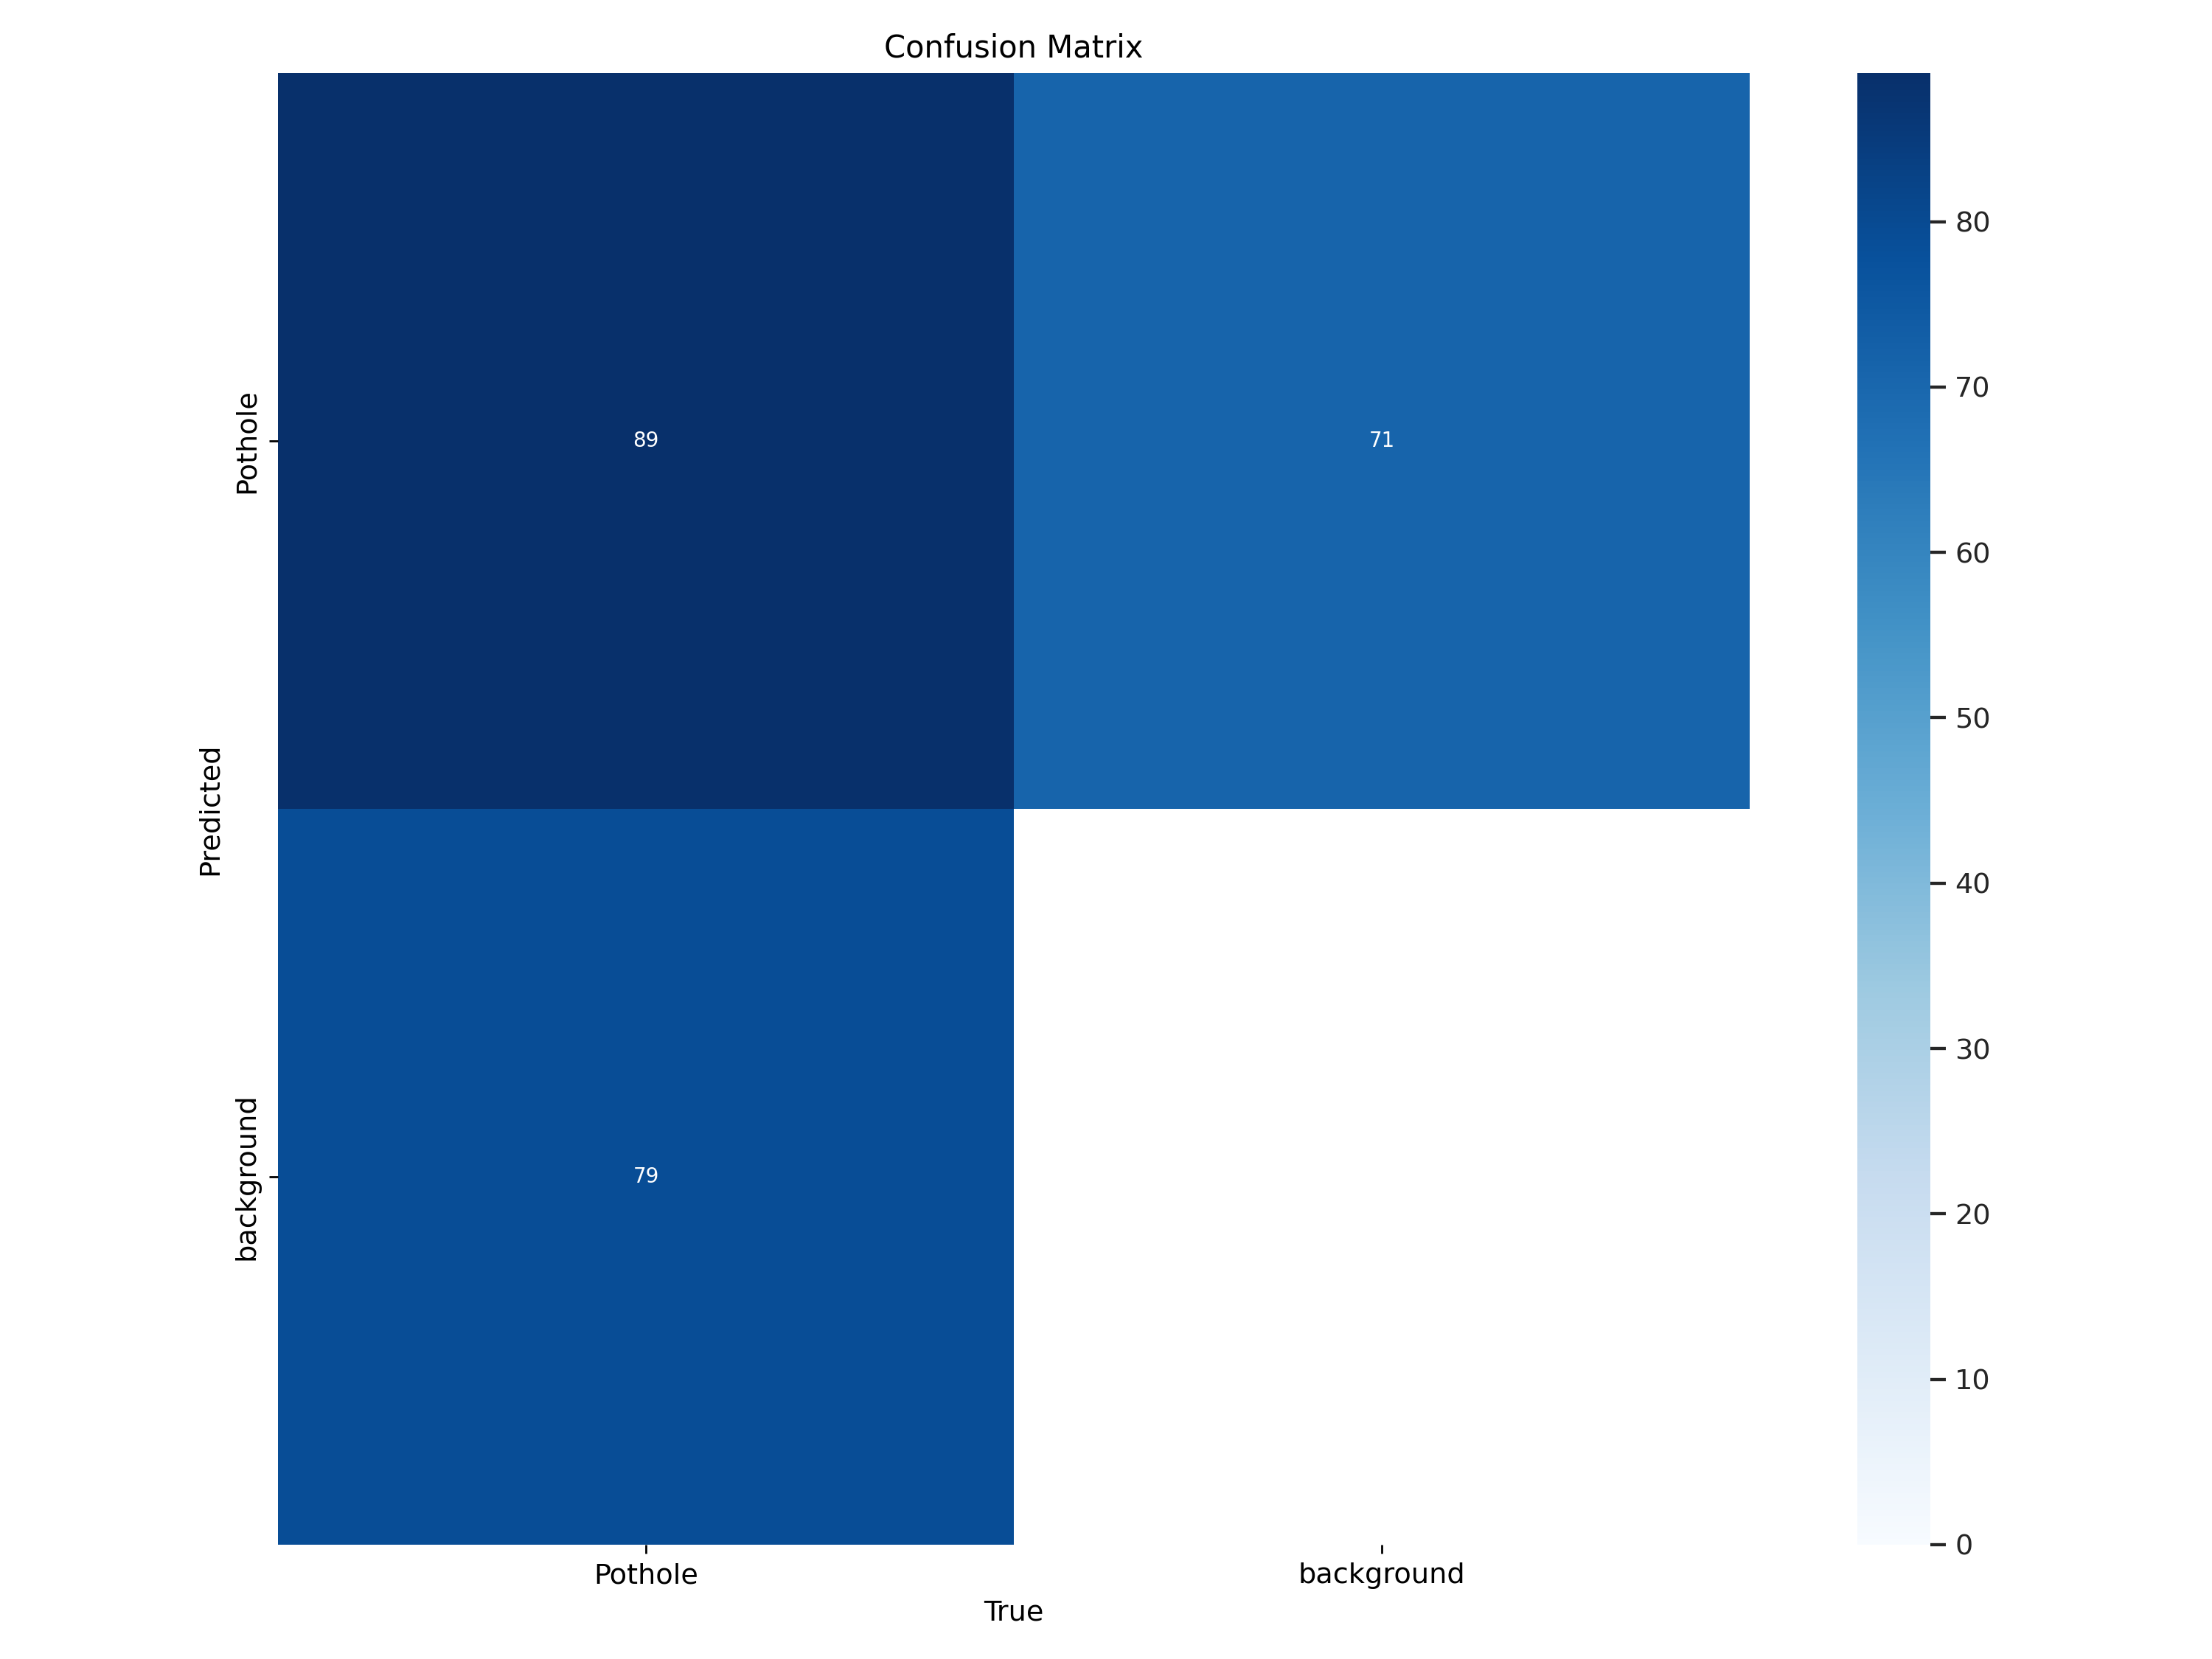

In [ ]:
Image(filename = '/content/runs/detect/train/confusion_matrix.png', width = 900)

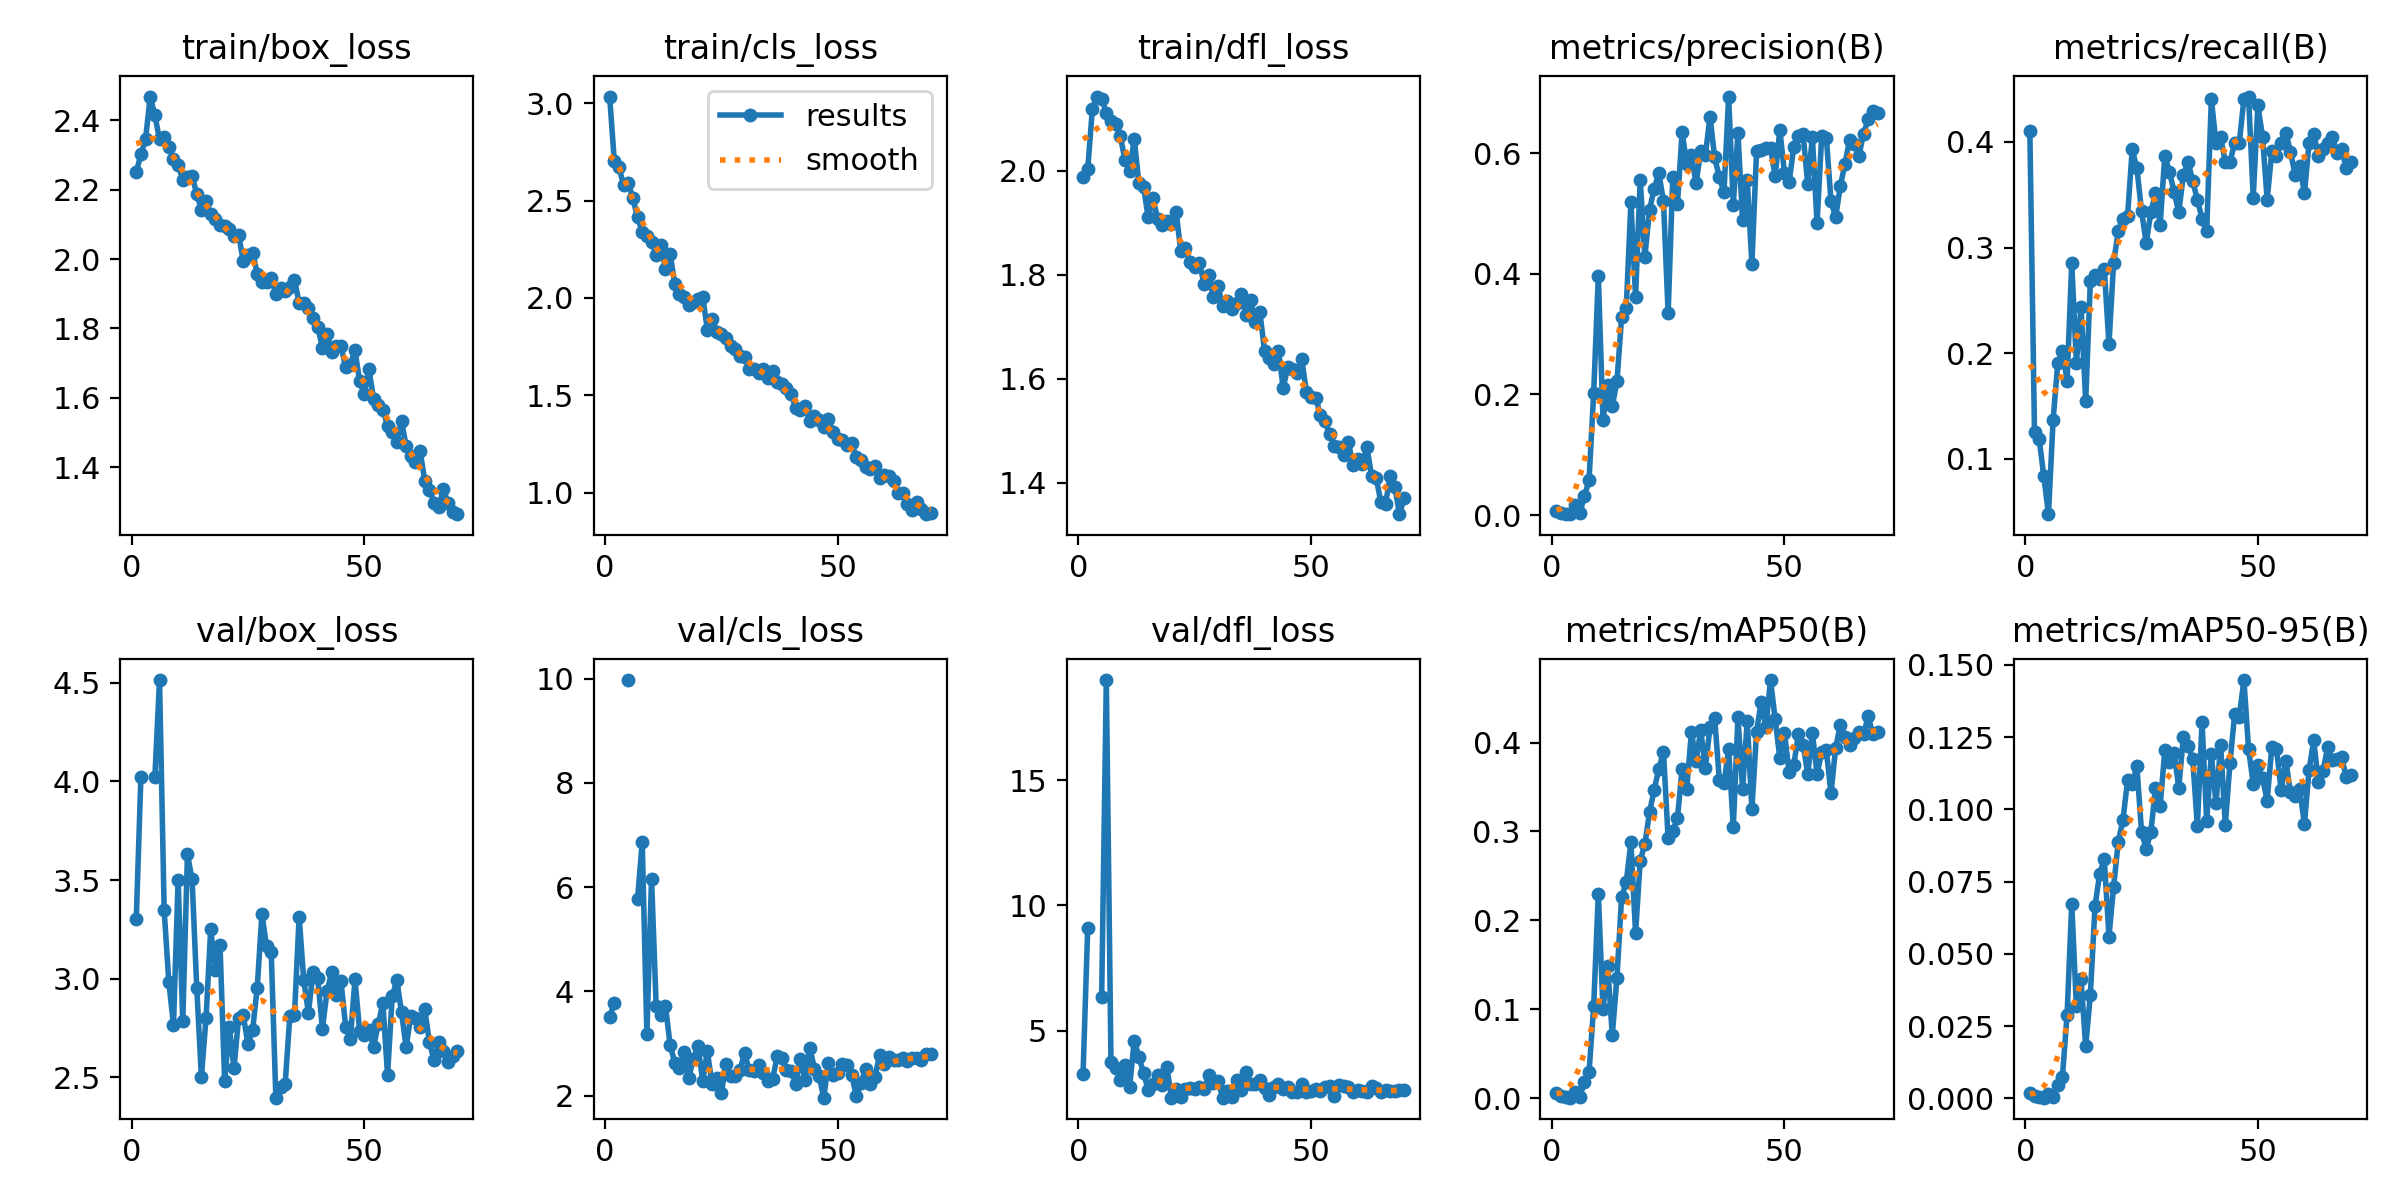

In [ ]:

Image(filename = '/content/runs/detect/train/results.png', width = 600)

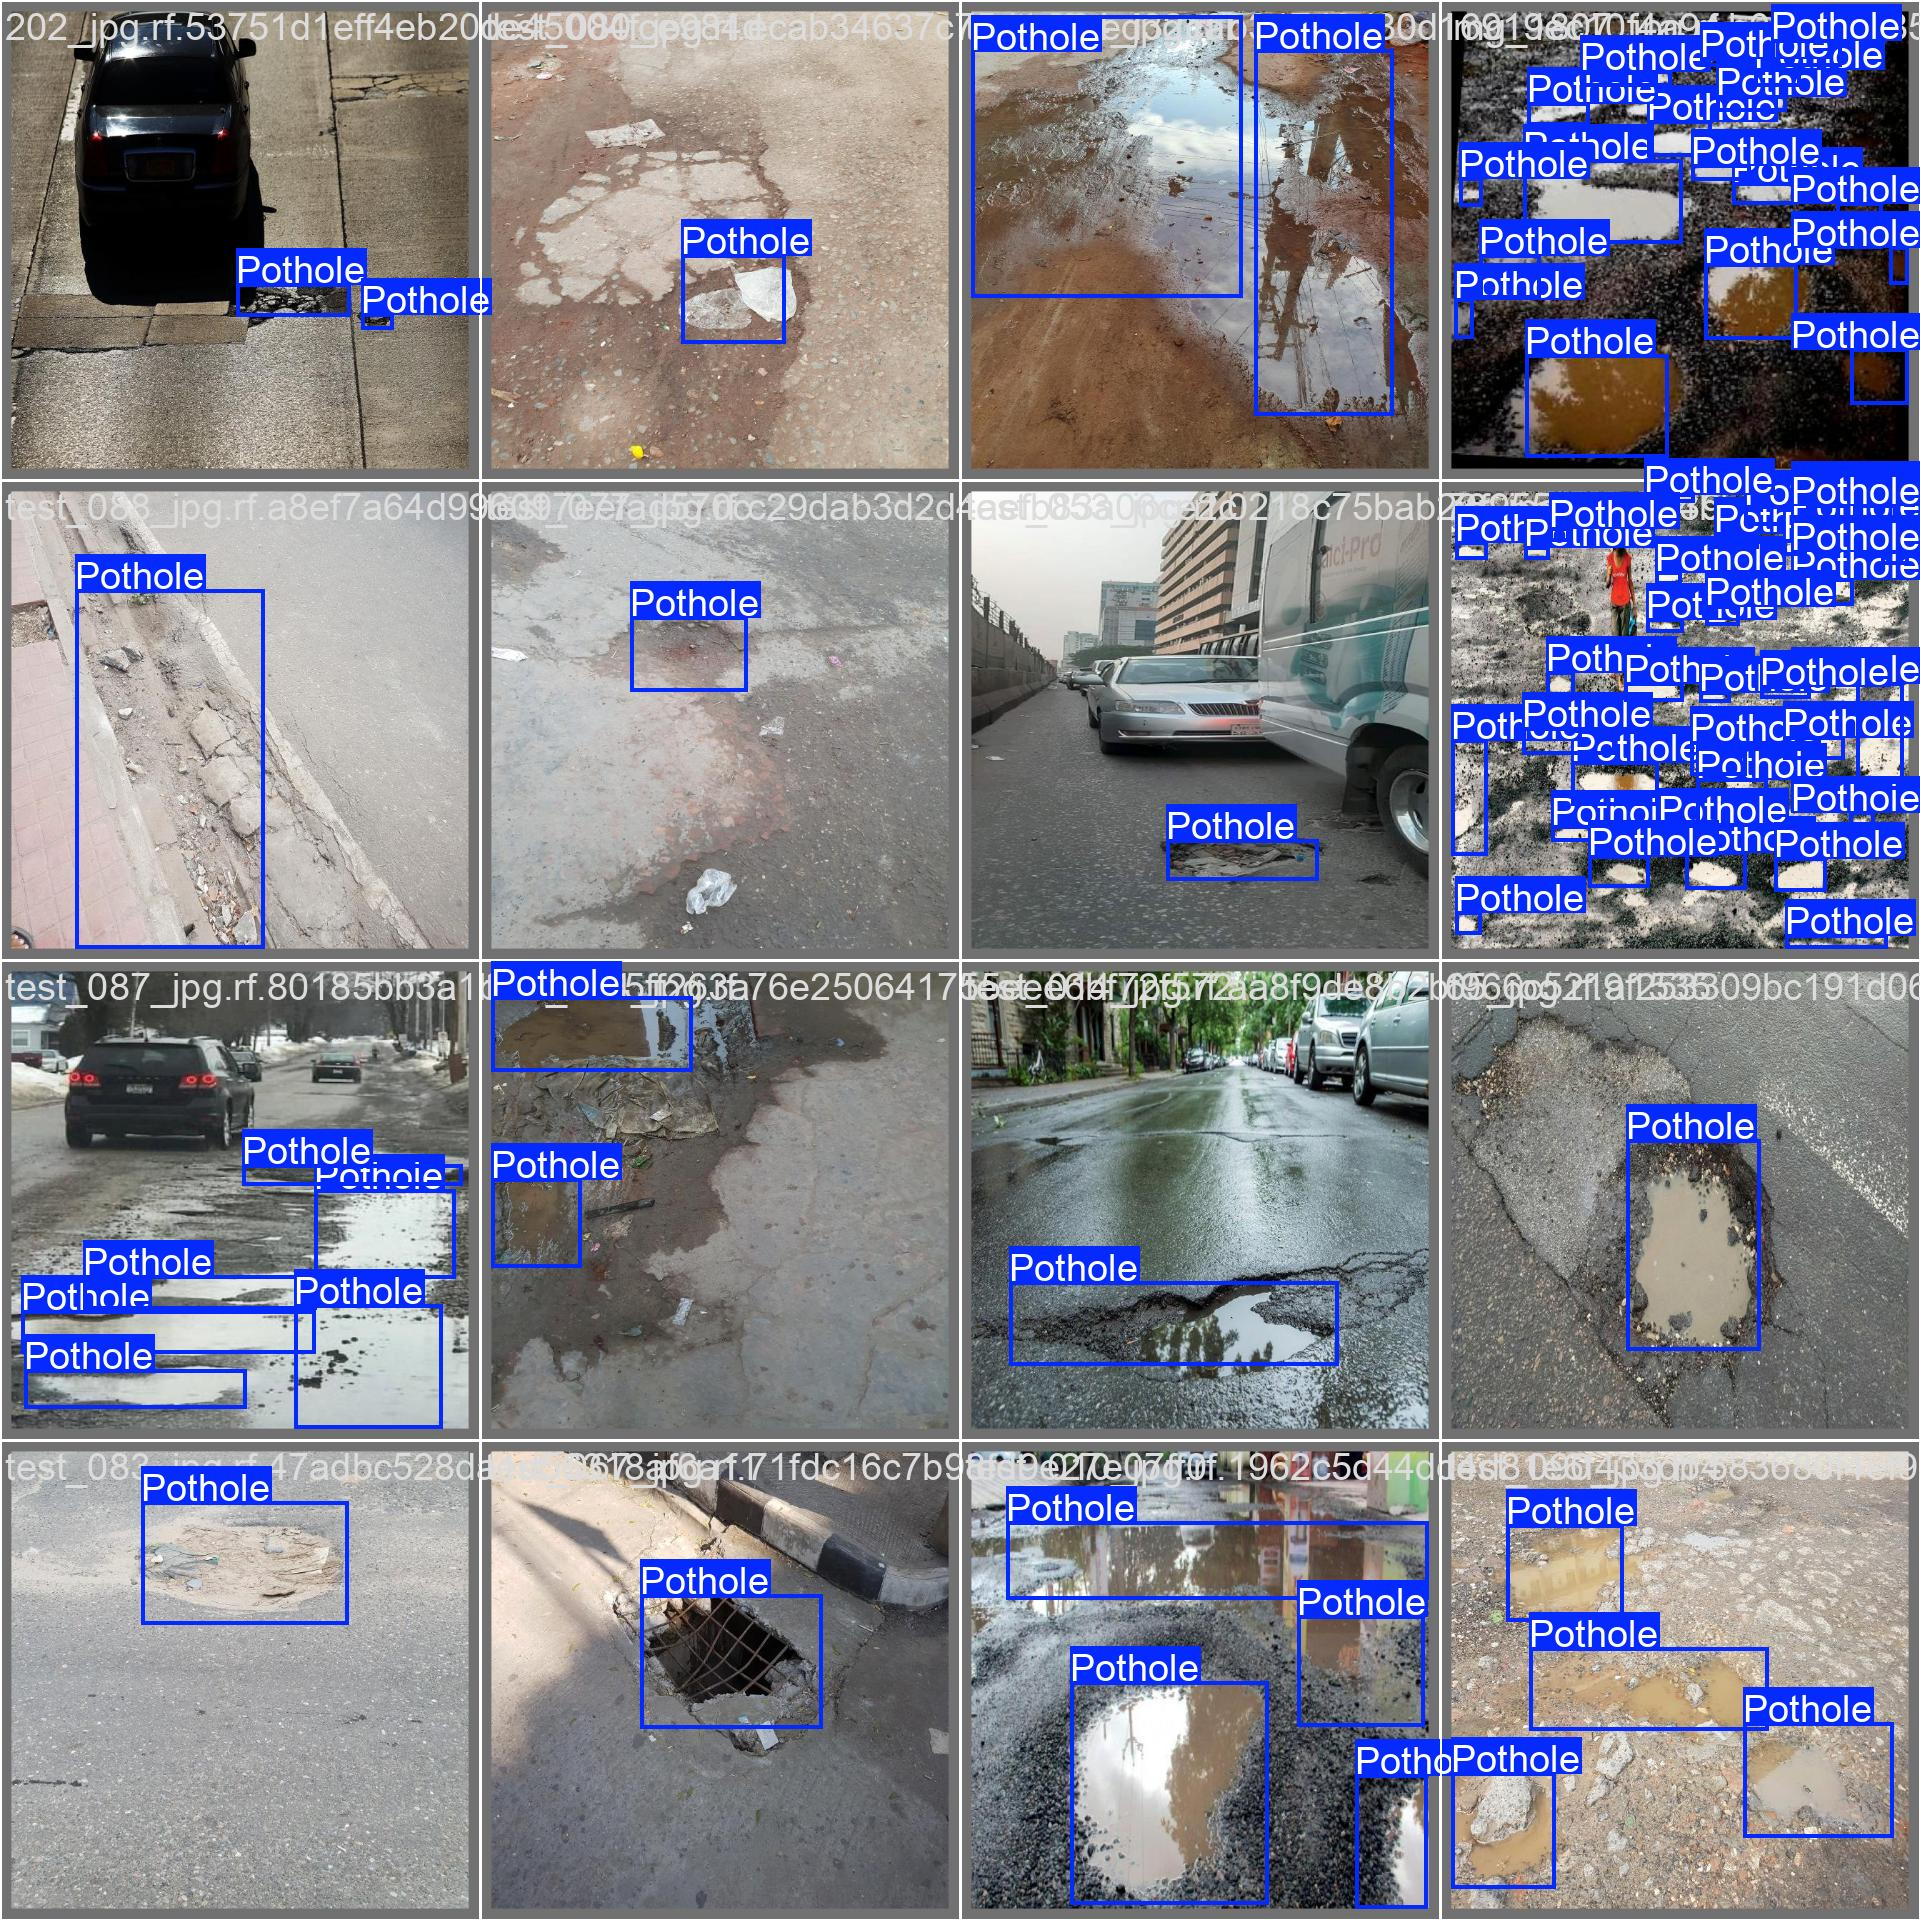

In [ ]:
Image(filename = '/content/runs/detect/train/val_batch0_labels.jpg', width = 600)

In [ ]:

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/PotholeDetection-1/test/images'



Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 236 layers, 23,203,411 parameters, 0 gradients, 67.4 GFLOPs

image 1/18 /content/PotholeDetection-1/test/images/203_jpg.rf.421e57513fbef21241a3fb32bf871ef4.jpg: 640x640 3 Potholes, 34.3ms
image 2/18 /content/PotholeDetection-1/test/images/361_jpg.rf.438de7f0936242c9c91443955c8f25fd.jpg: 640x640 6 Potholes, 34.4ms
image 3/18 /content/PotholeDetection-1/test/images/362_jpg.rf.f32078cb9389b93e48766ea3135f8ac3.jpg: 640x640 13 Potholes, 34.4ms
image 4/18 /content/PotholeDetection-1/test/images/406_jpg.rf.e61891d7614806340c79b0d67092105f.jpg: 640x640 3 Potholes, 34.4ms
image 5/18 /content/PotholeDetection-1/test/images/48_jpg.rf.5ffd48568353ca4172da90092f9eaf7c.jpg: 640x640 3 Potholes, 34.3ms
image 6/18 /content/PotholeDetection-1/test/images/570_jpg.rf.5ea8b0c112d66d8f0173aff7d412581f.jpg: 640x640 3 Potholes, 34.3ms
image 7/18 /content/PotholeDetection-1/test/images/598_jpg.rf.3ed25de0fbd

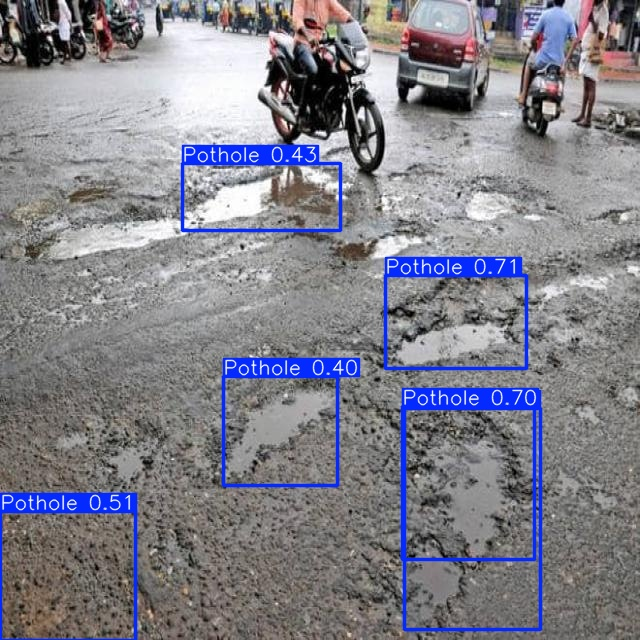

In [ ]:
Image('/content/runs/detect/predict/361_jpg.rf.438de7f0936242c9c91443955c8f25fd.jpg')


In [ ]:

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt  conf=0.25 source='/content/drive/MyDrive/PurdueWork/pothole_test_video.mp4'

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 124.8ms
video 1/1 (2/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.8ms
video 1/1 (3/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.7ms
video 1/1 (4/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.7ms
video 1/1 (5/324) /content/drive/MyDrive/demo.mp4: 384x640 (no detections), 25.7ms
video 1/1 (6/324) /content/drive/MyDrive/demo.mp4: 384x640 1 Pothole, 25.7ms
video 1/1 (7/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 25.7ms
video 1/1 (8/324) /content/drive/MyDrive/demo.mp4: 384x640 1 Pothole, 25.7ms
video 1/1 (9/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 24.0ms
video 1/1 (10/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 18.6ms
video 1/1 (11/324) /content/drive/My

# yolo v11

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZlJqU9FcIqZLHUFSWKkY")
project = rf.workspace("qcdgrp19").project("potholedetection-6fvuv")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = version.download("yolov11")
print(dataset.location)

/content/PotholeDetection-1


In [ ]:
!yolo task=detect mode=train model='/content/yolo11n.pt' data='/content/PotholeDetection-1/data.yaml' epochs=70 imgsz=640


Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/PotholeDetection-1/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

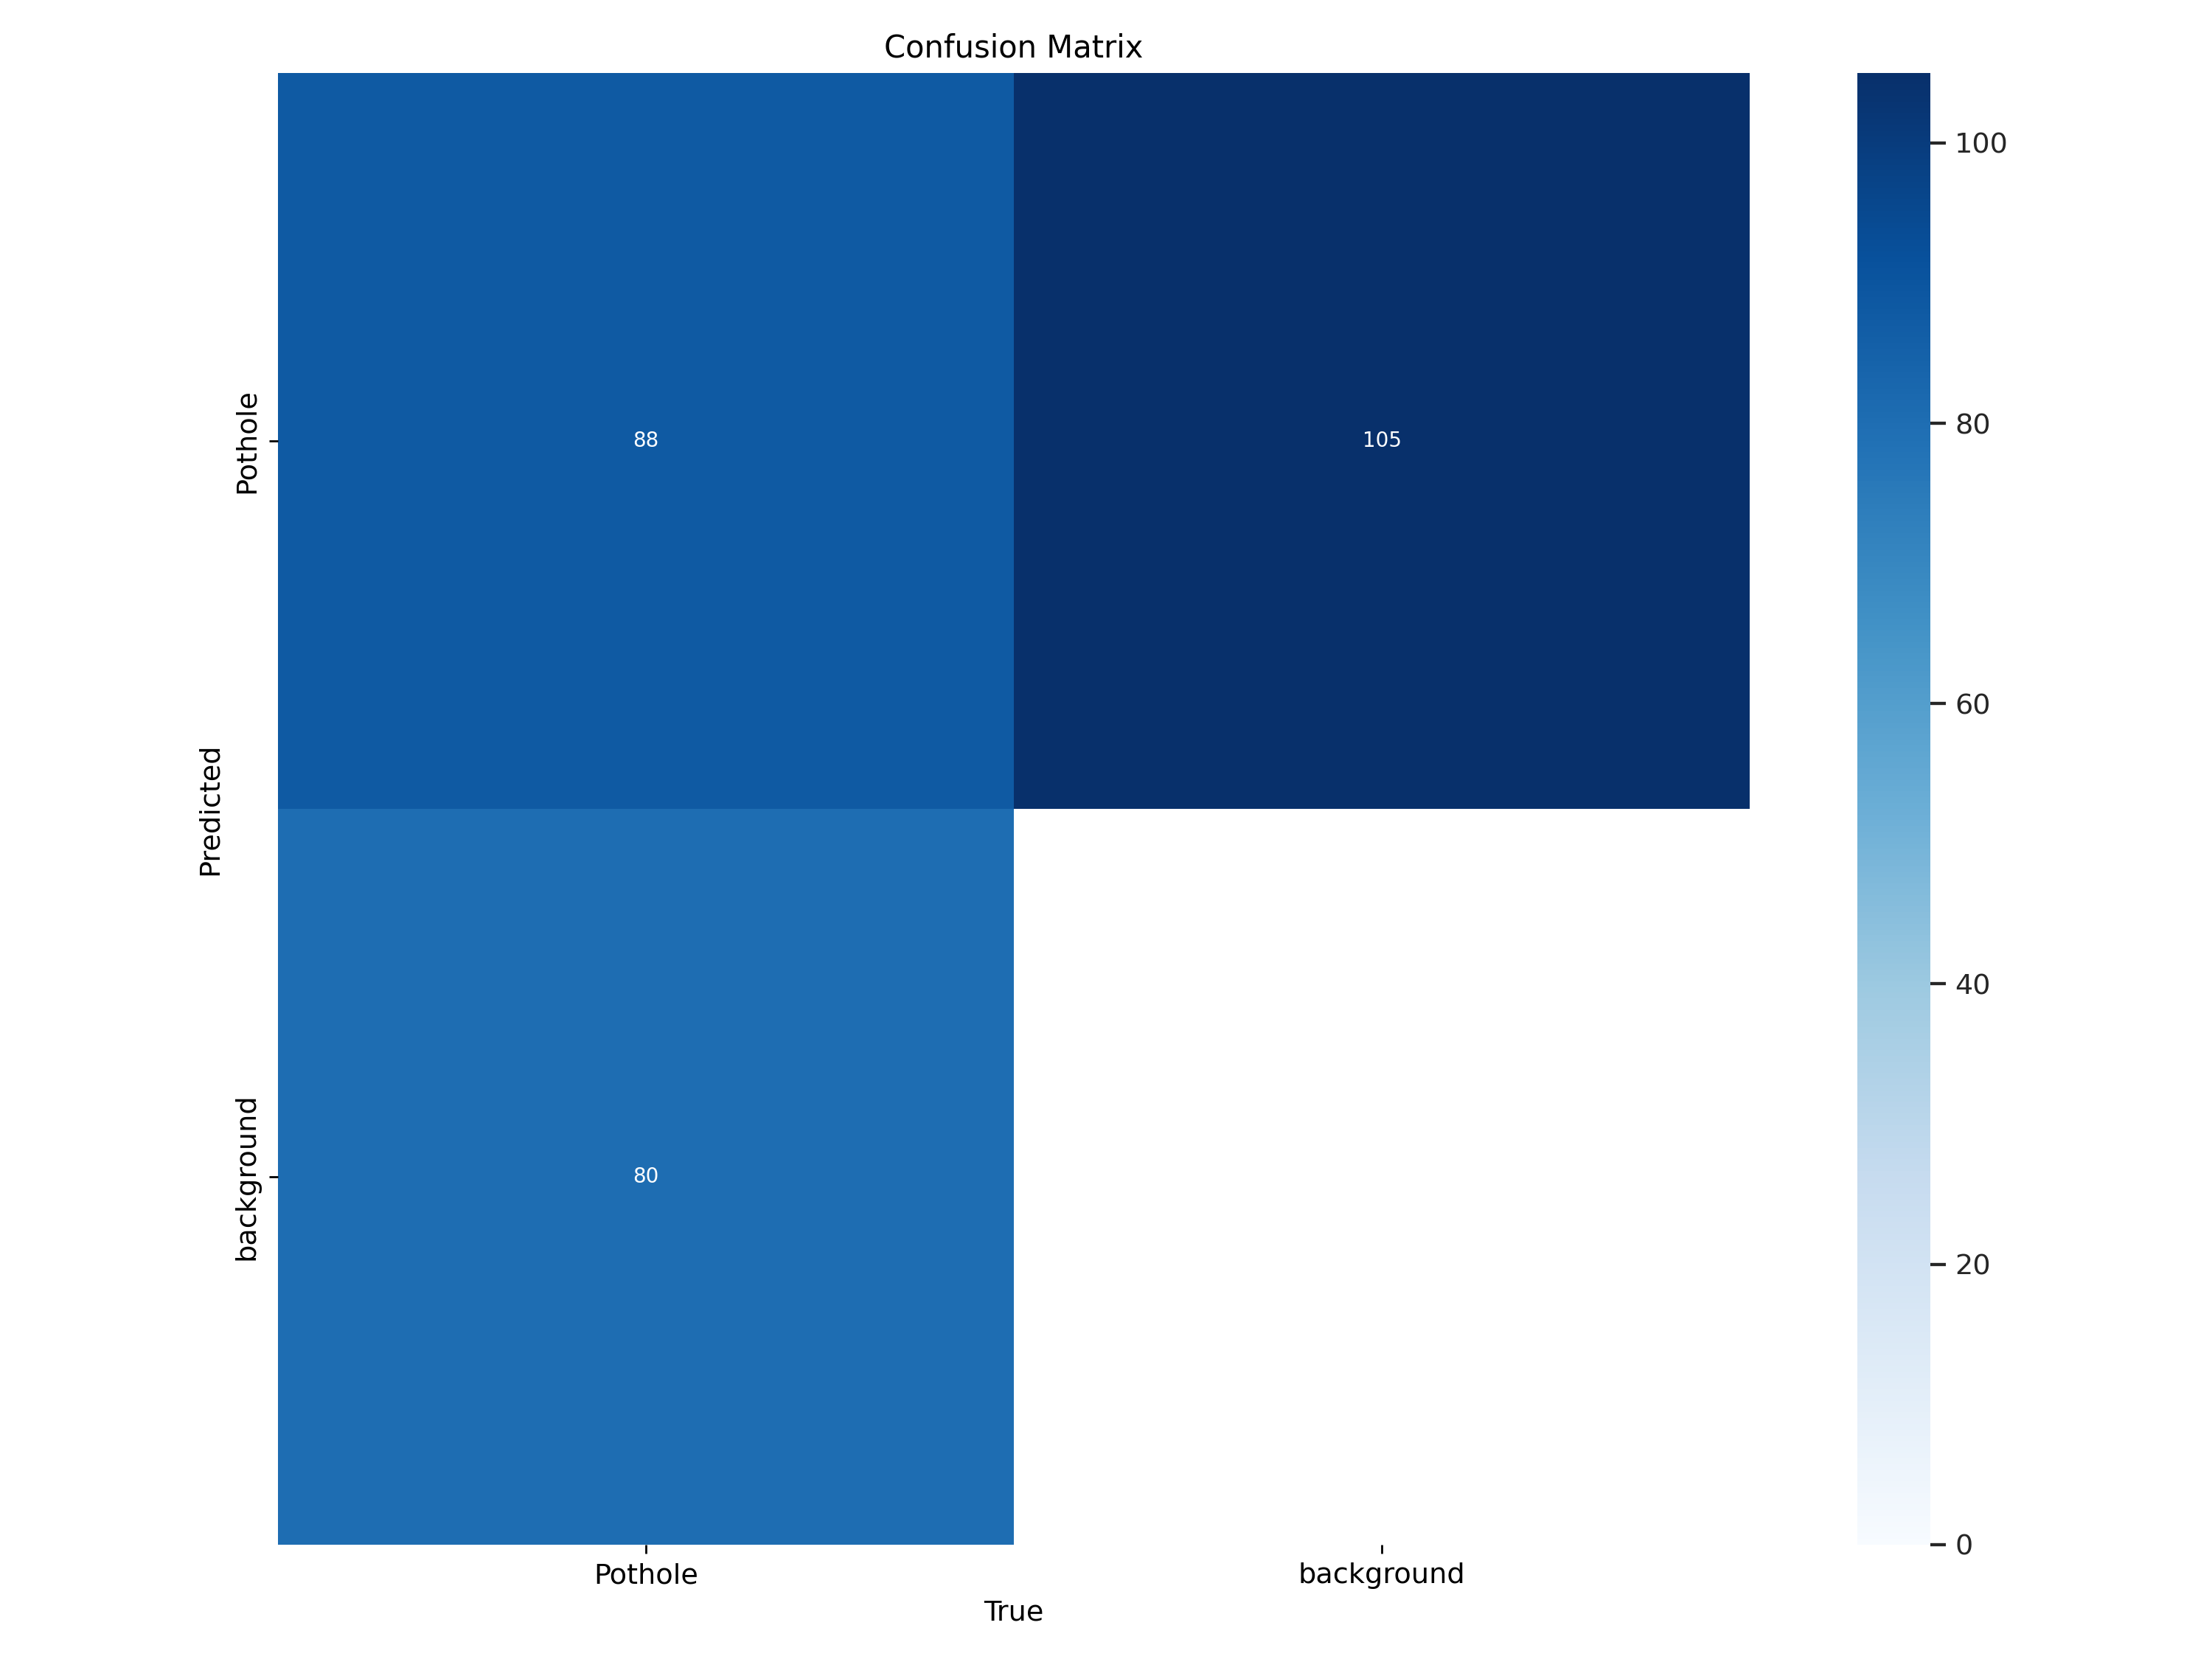

In [ ]:
Image(filename = '/content/runs/detect/train2/confusion_matrix.png', width = 900)

In [ ]:

!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='/content/PotholeDetection-1/test/images'



Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/18 /content/PotholeDetection-1/test/images/203_jpg.rf.421e57513fbef21241a3fb32bf871ef4.jpg: 640x640 4 Potholes, 16.1ms
image 2/18 /content/PotholeDetection-1/test/images/361_jpg.rf.438de7f0936242c9c91443955c8f25fd.jpg: 640x640 10 Potholes, 16.2ms
image 3/18 /content/PotholeDetection-1/test/images/362_jpg.rf.f32078cb9389b93e48766ea3135f8ac3.jpg: 640x640 27 Potholes, 11.4ms
image 4/18 /content/PotholeDetection-1/test/images/406_jpg.rf.e61891d7614806340c79b0d67092105f.jpg: 640x640 6 Potholes, 11.6ms
image 5/18 /content/PotholeDetection-1/test/images/48_jpg.rf.5ffd48568353ca4172da90092f9eaf7c.jpg: 640x640 4 Potholes, 11.5ms
image 6/18 /content/PotholeDetection-1/test/images/570_jpg.rf.5ea8b0c112d66d8f0173aff7d412581f.jpg: 640x640 1 Pothole, 11.1ms
image 7/18 /content/PotholeDetection-1/test/images/598_jpg.rf.3ed25de0fbd